<a href="https://colab.research.google.com/github/illyesa/Bootcamp_GENAI_Fev2025/blob/main/DailyChallengeW4D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


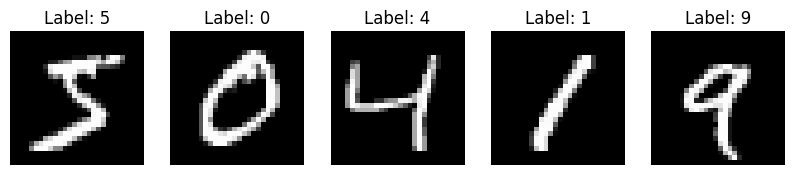

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8559 - loss: 0.4888 - val_accuracy: 0.9586 - val_loss: 0.1417
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9651 - loss: 0.1191 - val_accuracy: 0.9653 - val_loss: 0.1142
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9752 - loss: 0.0814 - val_accuracy: 0.9697 - val_loss: 0.0955
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9831 - loss: 0.0544 - val_accuracy: 0.9704 - val_loss: 0.0987
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9693 - val_loss: 0.1003
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9875 - loss: 0.0372 - val_accuracy: 0.9707 - val_loss: 0.1074
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9889 - loss: 0.0334 - val_accuracy: 0.9733 - val_loss: 0.1068
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9936 - loss: 0.02

<Figure size 800x600 with 0 Axes>

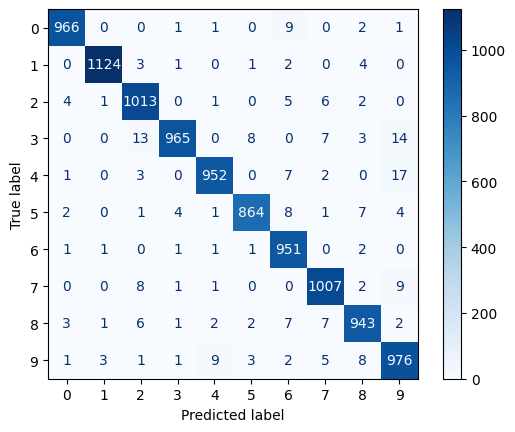

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {np.argmax(y_train[i])}")
    ax.axis('off')
plt.show()

# 2
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# 4
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.show()
